## Calibration of lab probes ANK1 ANK2

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes have been bent on purpose.


Channel order: CH1 - ANK1, CH2 - ANK2

I ran this calibration in situ for ANK1, ANK2 and no profiler probe.

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
df = pd.read_csv('../calibration_05nov19/calibration.csv')
print(df)


    percentage   density  temperature
0            0  0.998280       20.006
1           10  1.002720       20.011
2           20  1.007768       20.000
3           30  1.010540       20.000
4           40  1.016503       20.001
5           50  1.020214       20.000
6           60  1.023267       20.001
7           70  1.027774       19.999
8           80  1.035498       20.000
9           90  1.040364       20.000
10         100  1.045360       20.001


../calibration_05nov19/000pc.mat
../calibration_05nov19/010pc.mat
../calibration_05nov19/020pc.mat
../calibration_05nov19/030pc.mat
../calibration_05nov19/040pc.mat
../calibration_05nov19/050pc.mat
../calibration_05nov19/060pc.mat
../calibration_05nov19/070pc.mat
../calibration_05nov19/080pc.mat
../calibration_05nov19/090pc.mat
../calibration_05nov19/100pc.mat


Text(0.5,1,'CH2 - ANK2 ')

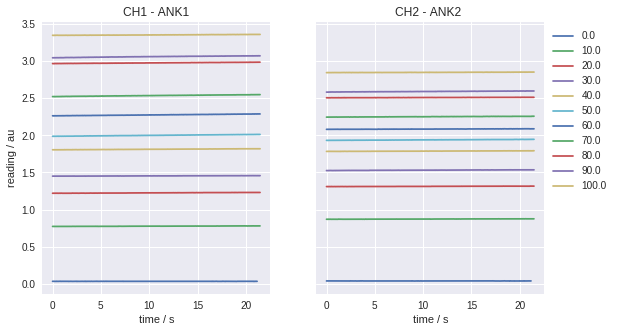

In [10]:
nums = ['000','010','020','030','040','050','060','070','080','090','100']
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_05nov19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2, label='%1.1f' %df.percentage[ii])
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')

ANK1
rho_1 = 0.997970+0.003838r+0.003729r^2+-0.000199r^3 

ANK2
rho_2 = 0.998538+-0.002338r+0.007345r^2+-0.000210r^3 



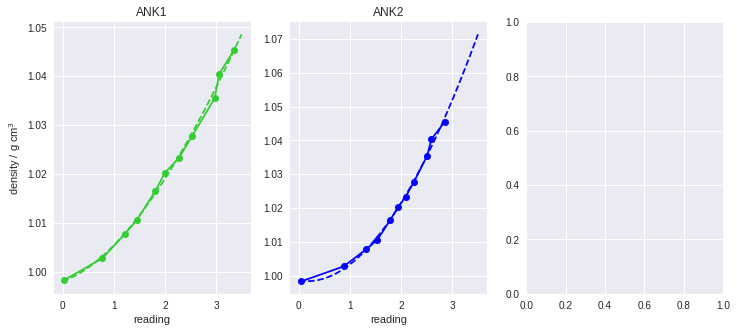

In [14]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,3.5,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5))

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')

print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))